# IST 718 Final Project: World Happiness 

In [3]:
# IST 718 Project


In [4]:
#Much analysis very wow


In [5]:
# Sources

# Happiness, mortality
# https://worldhappiness.report/ed/2021/

# Alcohol
# https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption
# https://www.kaggle.com/sansuthi/alcohol-consumption 
# https://apps.who.int/gho/data/node.main.A1039?lang=en 

# Crime
# https://www.numbeo.com/crime/rankings_by_country.jsp  

# Pollution
# https://www.numbeo.com/pollution/rankings_by_country.jsp 

# Inflation
# https://tradingeconomics.com/country-list/inflation-rate

# Unemployment
# https://worldpopulationreview.com/country-rankings/unemployment-by-country

# GDP
# https://knoema.com/atlas/ranks/GDP-per-capita?action=export&gadget=tranking-container&action=export&gadget=tranking-container


# Data Prep

In [6]:
# Import statements

import pandas as pd
import requests

# For reading data from G Drive
from google.colab import drive
drive.mount('/content/drive')

# For Graphs 
import plotly.graph_objects as go

Mounted at /content/drive


In [7]:
# Get world happiness report data (2010-2020)

world = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/DataPanelWHR2021C2.csv")

print(world.shape)
world.head()

# Outcome Variable is "Life Ladder" that is the name of the scale used to determine happiness YoY 

(1949, 11)


Country name  year  ...  Positive affect  Negative affect
0  Afghanistan  2008  ...            0.518            0.258
1  Afghanistan  2009  ...            0.584            0.237
2  Afghanistan  2010  ...            0.618            0.275
3  Afghanistan  2011  ...            0.611            0.267
4  Afghanistan  2012  ...            0.710            0.268

[5 rows x 11 columns]

In [8]:
# Load region data (2016)

region = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/HappinessAlcoholConsumption.csv")
region.head()
# Merge region data with world happiness dataset

world = world.merge(region, left_on = 'Country name', right_on = 'Country')

# Drop extra columns
world = world.drop(columns = ['Country', 'Hemisphere',	'HappinessScore',	'HDI',	'GDP_PerCapita',	'Spirit_PerCapita'])

world.head()


Country name  year  ...  Beer_PerCapita  Wine_PerCapita
0      Albania  2007  ...              89              54
1      Albania  2009  ...              89              54
2      Albania  2010  ...              89              54
3      Albania  2011  ...              89              54
4      Albania  2012  ...              89              54

[5 rows x 14 columns]

In [9]:
# Load alcohol/happiness data (2016)

#alcohol = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/HappinessAlcoholConsumption.csv")

#alcohol.head()

# Merge alcohol/happiness data with world happiness dataset

#happy = world.merge(alcohol, left_on = 'Country name', right_on = 'Country')

# Drop extra country column
#happy = happy.drop(columns = ['Country'])

#happy.head()

# Load and merge alcohol data set 

#alcohol2 = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/gapminder_alcohol.csv")
#alcohol2.head()

#happy = happy.merge(alcohol2, left_on = 'Country name', right_on = 'country')

# Drop extra country column
#happy = happy.drop(columns = ['country'])

#happy.head()


In [10]:
# Load and merge alcohol data set - total alcohol consumption per capita (2010-2019)
# https://stackoverflow.com/questions/28117397/pandas-how-to-convert-an-index-of-int64-years-to-datetime

alcohol = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/xmart.csv")
#alcohol = pd.read_csv("xmart.csv")

alcohol.columns = ['Country', 'Source', 'Beverage', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010'] # rename columns 

alcohol = alcohol.iloc[1: , :] # Drop first row

# melt data so year is a column
alcohol = alcohol.melt(id_vars = ['Country', 'Source', 'Beverage'])

alcohol = alcohol.drop(columns=['Source'])

alcohol = alcohol.pivot_table(index=['Country', 'variable'], columns='Beverage', values='value').reset_index()

# convert years to datetime dtypes
world['year'] = pd.to_datetime(world['year'], format='%Y')
alcohol['variable'] = pd.to_datetime(alcohol['variable'], format='%Y')

# merge world and alcohol data sets where country and year match up
happy = pd.merge(world, alcohol, how = 'inner', left_on = ['Country name', 'year'], right_on = ['Country', 'variable'])

# Drop extra country column
happy = happy.drop(columns = ['variable'])

happy.head()

#happy.shape #(6668, 15)


Country name       year  ...   Spirits   Wine
0      Albania 2010-01-01  ...      1.97   1.08
1      Albania 2011-01-01  ...      1.99   1.08
2      Albania 2012-01-01  ...      1.88   1.12
3      Albania 2013-01-01  ...      1.79   1.07
4      Albania 2014-01-01  ...      1.74   0.99

[5 rows x 20 columns]

In [11]:
# Load and merge GDP data for all years
# https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

gdp = pd.read_csv("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/GDP.csv", encoding='latin-1')
#gdp = pd.read_csv("GDP.csv", encoding='latin-1')

gdp.head()


# melt data so year is a column
gdp = gdp.melt(id_vars = ['Country'])

# convert years to datetime dtypes
gdp['variable'] = pd.to_datetime(gdp['variable'], format='%Y')

# merge world and gdp data sets where country and year match up
happy = pd.merge(world, gdp, how = 'inner', left_on = ['Country name', 'year'], right_on = ['Country', 'variable'])

# Drop extra country column
happy = happy.drop(columns = ['variable'])

# rename value column
happy = happy.rename(columns={"value": "GDP per capita"})

happy.head()

happy_all = happy

happy_all.head()
#happy.shape #(1415, 13)


Country name       year  Life Ladder  ...  Wine_PerCapita  Country  GDP per capita
0      Albania 2010-01-01        5.269  ...              54  Albania          4098.0
1      Albania 2011-01-01        5.867  ...              54  Albania          4440.0
2      Albania 2012-01-01        5.510  ...              54  Albania          4249.0
3      Albania 2013-01-01        4.551  ...              54  Albania          4416.0
4      Albania 2014-01-01        4.814  ...              54  Albania          4585.0

[5 rows x 16 columns]

In [12]:
happy_all['YEAR'] = pd.DatetimeIndex(happy_all['year']).year
happy_all.head()

Country name       year  Life Ladder  ...  Country  GDP per capita  YEAR
0      Albania 2010-01-01        5.269  ...  Albania          4098.0  2010
1      Albania 2011-01-01        5.867  ...  Albania          4440.0  2011
2      Albania 2012-01-01        5.510  ...  Albania          4249.0  2012
3      Albania 2013-01-01        4.551  ...  Albania          4416.0  2013
4      Albania 2014-01-01        4.814  ...  Albania          4585.0  2014

[5 rows x 17 columns]

In [13]:
# Load and merge data for 2020 only

world2020 = world[world['year'] == '2020-01-01T00:00:00.000000000']
world2020.shape

#world2020

(79, 14)

In [14]:
# Load crime data (2020)

crime_url = "https://www.numbeo.com/crime/rankings_by_country.jsp?title=2020"
crime_html = requests.get(crime_url).content

crime_list = pd.read_html(crime_html)
crimes = crime_list[-1]

# Drop Rank column
crimes = crimes.drop(columns = ['Rank'])

#crimes.head()


In [15]:
# Merge crime data

world2020 = world2020.merge(crimes, left_on = 'Country name', right_on = 'Country')

# Drop extra country column
world2020 = world2020.drop(columns = ['Country'])

world2020.head()

Country name       year  ...  Crime Index  Safety Index
0      Albania 2020-01-01  ...        39.52         60.48
1    Argentina 2020-01-01  ...        61.77         38.23
2    Australia 2020-01-01  ...        41.36         58.64
3      Austria 2020-01-01  ...        23.73         76.27
4      Bahrain 2020-01-01  ...        29.29         70.71

[5 rows x 16 columns]

In [16]:
# Load pollution data (2020)

pollution_url = "https://www.numbeo.com/pollution/rankings_by_country.jsp?title=2020"
pollution_html = requests.get(pollution_url).content

pollution_list = pd.read_html(pollution_html)
pollution = pollution_list[-1]

# Drop Rank column
pollution = pollution.drop(columns = ['Rank'])

#pollution.head()


In [17]:
# Merge pollution data

world2020 = world2020.merge(pollution, left_on = 'Country name', right_on = 'Country')

# Drop extra country column
world2020 = world2020.drop(columns = ['Country'])

world2020.head()

Country name       year  ...  Pollution Index  Exp Pollution Index
0      Albania 2020-01-01  ...            77.77               136.72
1    Argentina 2020-01-01  ...            50.67                86.36
2    Australia 2020-01-01  ...            23.46                37.50
3      Austria 2020-01-01  ...            22.19                36.63
4      Bahrain 2020-01-01  ...            71.43               128.76

[5 rows x 18 columns]

In [18]:
# Load inflation data (2021)

#inflation_url = "https://tradingeconomics.com/country-list/inflation-rate"
#inflation_html = requests.get(inflation_url).content

#inflation_list = pd.read_html(inflation_html)
#inflation = inflation_list[0]

# Drop extraneous columns
#inflation = inflation.drop(columns = ['Unit'])

#inflation.head()


In [19]:
# Merge inflation data

#world2020 = world2020.merge(inflation, left_on = 'Country name', right_on = 'Country')

# Drop extra country column
#world2020 = world2020.drop(columns = ['Country'])

#world2020.head()

In [20]:
# Load unemployment data (2021)

#unemployment_url = "https://worldpopulationreview.com/country-rankings/unemployment-by-country"
#unemployment_html = requests.get(unemployment_url).content

#unemployment_list = pd.read_html(unemployment_html)
#unemployment = unemployment_list[0]

#unemployment.head()


In [21]:
# Merge unemployment data

#world2020 = world2020.merge(unemployment, left_on = 'Country name', right_on = 'Country')

# Drop extra country column
#world2020 = world2020.drop(columns = ['Country'])

#world2020.head()

In [22]:
# Load and merge COVID-19 data (2020)

covid = pd.read_excel("/content/drive/Shareddrives/IST 718 - Project Team Goldfish/Data/MortalityDataWHR2021C2.xlsx")

world2020 = world2020.merge(covid, left_on = 'Country name', right_on = 'Country name')

world2020.head()


Country name  ... Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average
0      Albania  ...                                                NaN                         
1    Argentina  ...                                                NaN                         
2    Australia  ...                                                NaN                         
3      Austria  ...                                         110.821198                         
4      Bahrain  ...                                                NaN                         

[5 rows x 34 columns]

In [23]:
# Check for null values

world2020.isnull().sum()

Country name                                                                    0
year                                                                            0
Life Ladder                                                                     0
Log GDP per capita                                                              3
Social support                                                                  0
Healthy life expectancy at birth                                                0
Freedom to make life choices                                                    0
Generosity                                                                      3
Perceptions of corruption                                                       5
Positive affect                                                                 1
Negative affect                                                                 1
Region                                                                          0
Beer_PerCapita  

In [24]:
# Get the number of unique countries
len(world2020['Country name'].unique())

# Get the shape of the data 
world2020.shape

(71, 34)

In [25]:
# Data to Label Countries
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
print(df.head())

          COUNTRY  GDP (BILLIONS) CODE
0     Afghanistan           21.71  AFG
1         Albania           13.40  ALB
2         Algeria          227.80  DZA
3  American Samoa            0.75  ASM
4         Andorra            4.80  AND


In [26]:
# Bring in GDP and Country Code
happy = world2020.merge(df, left_on = 'Country name', right_on = 'COUNTRY')
# Drop extra country column
#happy = happy.drop(columns = ['COUNTRY'])
happy.head()

Country name       year  Life Ladder  ...    COUNTRY  GDP (BILLIONS)  CODE
0      Albania 2020-01-01        5.365  ...    Albania           13.40   ALB
1    Argentina 2020-01-01        5.901  ...  Argentina          536.20   ARG
2    Australia 2020-01-01        7.137  ...  Australia         1483.00   AUS
3      Austria 2020-01-01        7.213  ...    Austria          436.10   AUT
4      Bahrain 2020-01-01        6.173  ...    Bahrain           34.05   BHR

[5 rows x 37 columns]

# Data Exploration

In [27]:
#happy_2020 = happy[happy["year"] == 2020]
#happy_2020.head()
happy_2020 = happy

In [28]:
# Exploratory Correlations 
corr_matrix = happy_2020.corr()
print(corr_matrix["Life Ladder"].sort_values(ascending=False))

Life Ladder                                                                    1.000000
Log GDP per capita                                                             0.883127
Social support                                                                 0.784163
Healthy life expectancy at birth                                               0.730500
Median age                                                                     0.685235
Wine_PerCapita                                                                 0.551052
Freedom to make life choices                                                   0.546615
Beer_PerCapita                                                                 0.541988
Safety Index                                                                   0.518361
Index of exposure to COVID-19  infections in other countries as of March 31    0.475529
Positive affect                                                                0.338532
Female head of government       

In [29]:
from pandas import DataFrame
cor_df = corr_matrix["Life Ladder"]
cor_df = pd.DataFrame(cor_df).reset_index()
cor_df = cor_df.dropna()
cor_df.sort_values('Life Ladder',inplace=True)
cor_df = cor_df.drop(0) # Drops Life Ladder from correlating with itself 

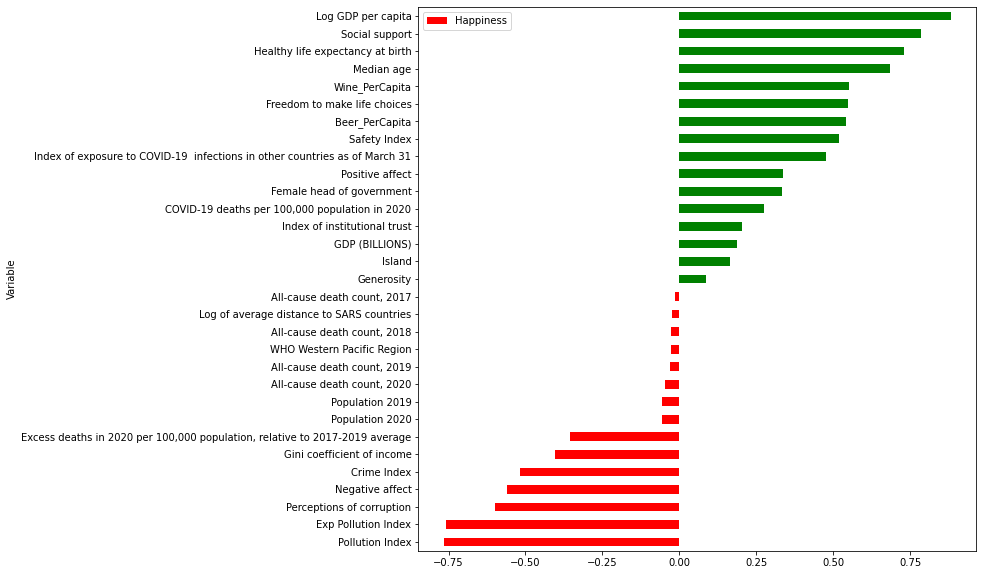

In [30]:
import numpy as np
colormat=np.where(cor_df['Life Ladder']>0, 'g','r')
cor_df.plot.barh(x='index', y='Life Ladder', rot=0, color=colormat,figsize=(10,10),xlabel="Variable",label='Happiness') 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa056a0c110>,
      dtype=object)

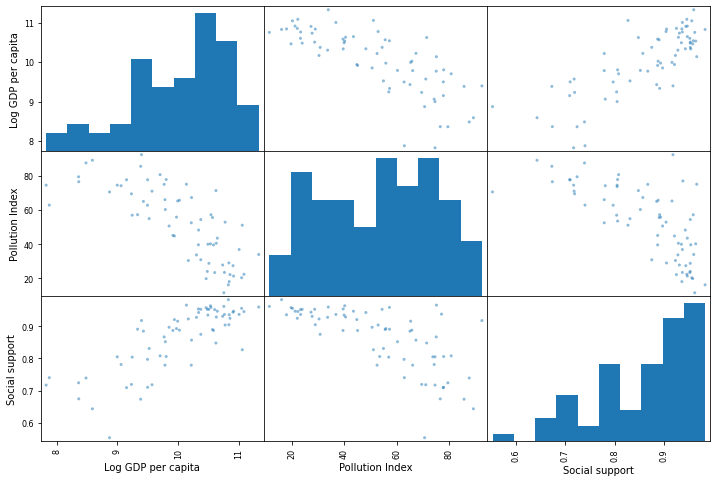

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["Log GDP per capita","Pollution Index","Social support"]
scatter_matrix(happy_2020[attributes], figsize=(12, 8))

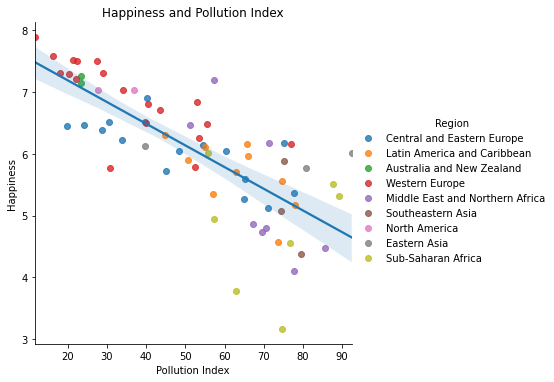

In [32]:
# Pollution and Happiness 
import seaborn as sns
import matplotlib.pyplot as plt
fig1= sns.lmplot(x='Pollution Index', y='Life Ladder', data=happy, hue='Region', fit_reg=False)
sns.regplot(x='Pollution Index', y='Life Ladder', data=happy, scatter=False, ax=fig1.axes[0,0])
_ = plt.xlabel('Pollution Index')
_ = plt.ylabel('Happiness')
_ = plt.title('Happiness and Pollution Index')
plt.show()

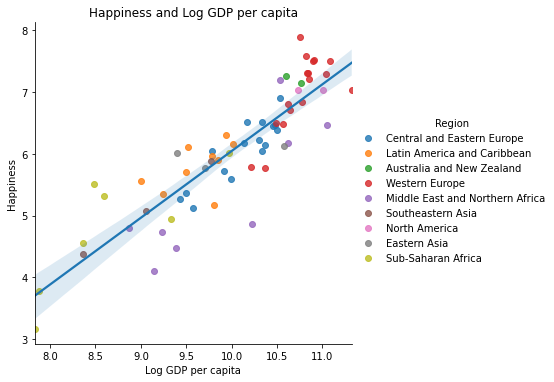

In [33]:
# Log GDP per capita and Happiness 
fig2= sns.lmplot(x='Log GDP per capita', y='Life Ladder', data=happy, hue='Region', fit_reg=False)
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=happy, scatter=False, ax=fig2.axes[0,0])
_ = plt.xlabel('Log GDP per capita')
_ = plt.ylabel('Happiness')
_ = plt.title('Happiness and Log GDP per capita')
plt.show()

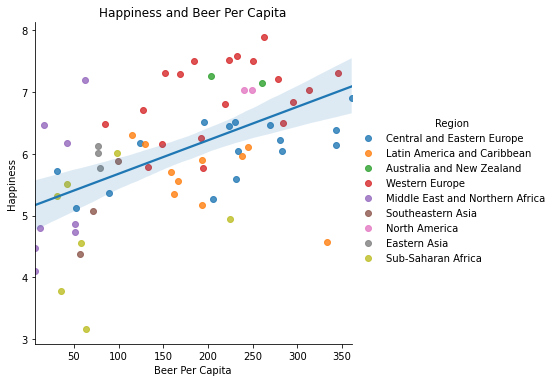

In [34]:
# Beer_PerCapita and Happiness 
fig3= sns.lmplot(x='Beer_PerCapita', y='Life Ladder', data=happy, hue='Region', fit_reg=False)
sns.regplot(x='Beer_PerCapita', y='Life Ladder', data=happy, scatter=False, ax=fig3.axes[0,0])
_ = plt.xlabel('Beer Per Capita')
_ = plt.ylabel('Happiness')
_ = plt.title('Happiness and Beer Per Capita')
plt.show()

In [35]:
# POTENTIAL RESEARCH QUESTION: WHAT FACTORS CORRELATE WITH YoY PERCENT CHANGE IN HAPPINESS

# Calculate Percent Change in Happiness (Over last 5 years; YoY in COVID Time.... do we see any correlations with % YoY Change?)
# Will need to transpose the data

# Define Percent Change Function
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

## Data Visualizations

In [36]:
# World Map Viz
world_2020 = world[world["year"] == 2020]
world_2020 = world_2020.merge(df, left_on = 'Country name', right_on = 'COUNTRY')

In [37]:
# World Map Viz using happy 2020 data (countries that made it through merges)

fig = go.Figure(data=go.Choropleth(
    locations = happy_2020 ['CODE'],
    z = happy_2020 ['Life Ladder'],
    text = happy_2020 ['Country name'],
    colorscale = 'Fall',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness<br>1-7 Scale',
))

fig.update_layout(
    title_text='2020 Global Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://worldhappiness.report/ed/2021/">\
            World Happiness Report</a>',
        showarrow = False
    )]
)
fig.update_layout(
    title={
        'text': "2020 Happiness Report",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [38]:
# Raw Countries (all included prior to data merges)

fig1aa = go.Figure(data=go.Choropleth(
    locations = happy ['CODE'],
    z = happy['Life Ladder'],
    text = happy ['Country name'],
    colorscale = 'Fall',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness<br>1-7 Scale',
))

fig1aa.update_layout(
    title_text='2020 Global Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://worldhappiness.report/ed/2021/">\
            World Happiness Report</a>',
        showarrow = False
    )]
)
fig1aa.update_layout(
    title={
        'text': "2020 Happiness Report",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig1aa.show()

In [39]:
# World Map Viz
world_2019 = happy_all[happy_all["YEAR"] == 2019]
world_2019 = world_2019.merge(df, left_on = 'Country name', right_on = 'COUNTRY')

In [40]:
fig1a = go.Figure(data=go.Choropleth(
    locations = world_2019 ['CODE'],
    z = world_2019 ['Life Ladder'],
    text = world_2019 ['Country name'],
    colorscale = 'Fall',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness<br>1-7 Scale',
))

fig1a.update_layout(
    title_text='2019 Global Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://worldhappiness.report/ed/2021/">\
            World Happiness Report</a>',
        showarrow = False
    )]
)
fig1a.update_layout(
    title={
        'text': "2019 Happiness Report",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig1a.show()

# Data Modeling

In [41]:
# From code provided by Professor Fox

# employ training-and-test regimen for model validation
import numpy as np
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf 

happy_cleanup = happy_all
happy_cleanup.columns = ['Country', 'year', 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support', 'Life_expectancy', 
                      'Freedom', 'Generosity', 'Corruption', 'Positive_affect', 'Negative_affect', 'Region', 'Beer_PerCapita', 
                      'Wine_PerCapita', 'Country_2', 'GDP_per_capita', 'YEAR']

happy_train = happy_cleanup[happy_cleanup['YEAR'] <= 2017]
happy_test = happy_cleanup[(happy_cleanup['YEAR'] == 2018) | (happy_cleanup['YEAR'] == 2019)]
# check training data frame
print('\nhappy_train data frame (rows, columns): ', happy_train.shape)
print(happy_train.head())
# check test data frame
print('\nhappy_test data frame (rows, columns): ', happy_test.shape)
print(happy_test.head())

# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Beer_PerCapita + Life_expectancy")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.




happy_train data frame (rows, columns):  (859, 17)
   Country       year  Life_Ladder  ...  Country_2  GDP_per_capita  YEAR
0  Albania 2010-01-01        5.269  ...    Albania          4098.0  2010
1  Albania 2011-01-01        5.867  ...    Albania          4440.0  2011
2  Albania 2012-01-01        5.510  ...    Albania          4249.0  2012
3  Albania 2013-01-01        4.551  ...    Albania          4416.0  2013
4  Albania 2014-01-01        4.814  ...    Albania          4585.0  2014

[5 rows x 17 columns]

happy_test data frame (rows, columns):  (210, 17)
      Country       year  Life_Ladder  ...  Country_2  GDP_per_capita  YEAR
8     Albania 2018-01-01        5.004  ...    Albania          5284.0  2018
9     Albania 2019-01-01        4.995  ...    Albania          5323.0  2019
23  Argentina 2018-01-01        5.793  ...  Argentina         11625.0  2018
24  Argentina 2019-01-01        6.086  ...  Argentina          9890.0  2019
34    Armenia 2018-01-01        5.062  ...    Armenia   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

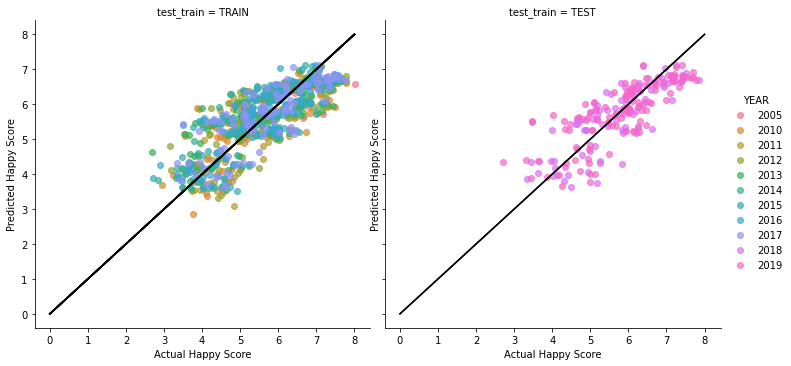

In [42]:
# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     702.2
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          3.21e-181
Time:                        19:34:59   Log-Likelihood:                -923.05
No. Observations:                 859   AIC:                             1852.
Df Residuals:                     856   BIC:                             1866.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.7128      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

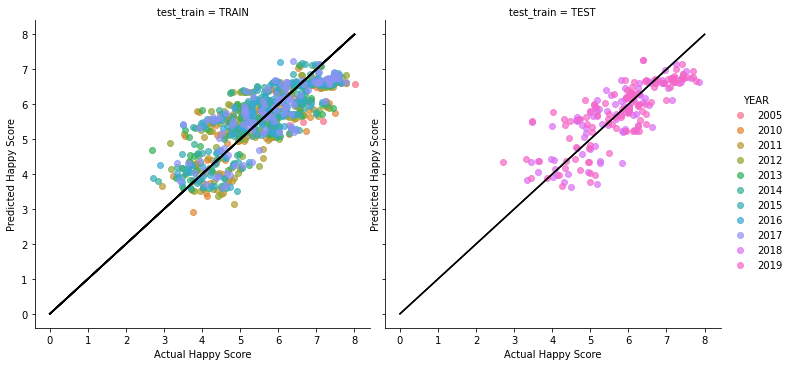

In [43]:
# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Life_expectancy")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     630.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          2.21e-215
Time:                        19:35:00   Log-Likelihood:                -832.33
No. Observations:                 853   AIC:                             1673.
Df Residuals:                     849   BIC:                             1692.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.4007      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

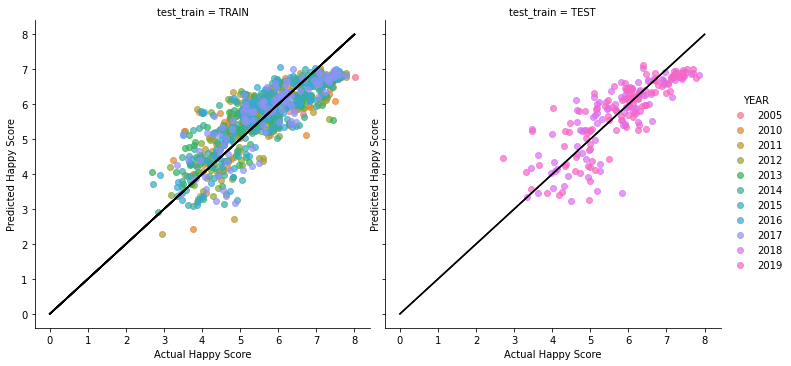

In [44]:
# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Life_expectancy + Social_support")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     630.5
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          3.43e-251
Time:                        19:35:01   Log-Likelihood:                -736.79
No. Observations:                 845   AIC:                             1484.
Df Residuals:                     840   BIC:                             1507.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.7562      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

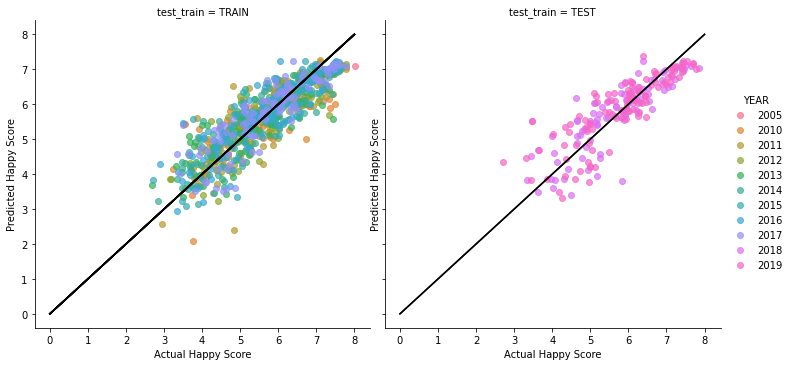

In [45]:
# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Life_expectancy + Social_support + Freedom")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     519.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.42e-248
Time:                        19:35:02   Log-Likelihood:                -689.96
No. Observations:                 807   AIC:                             1392.
Df Residuals:                     801   BIC:                             1420.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.4151      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

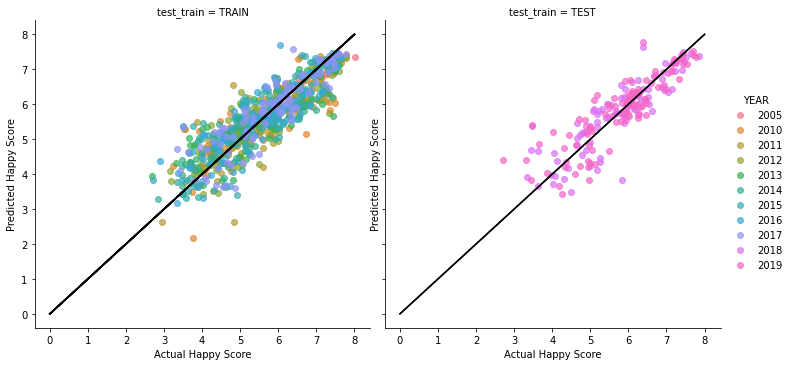

In [46]:
# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Life_expectancy + Social_support + Freedom + Corruption")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     378.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.13e-261
Time:                        19:35:03   Log-Likelihood:                -611.69
No. Observations:                 783   AIC:                             1241.
Df Residuals:                     774   BIC:                             1283.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.1263      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

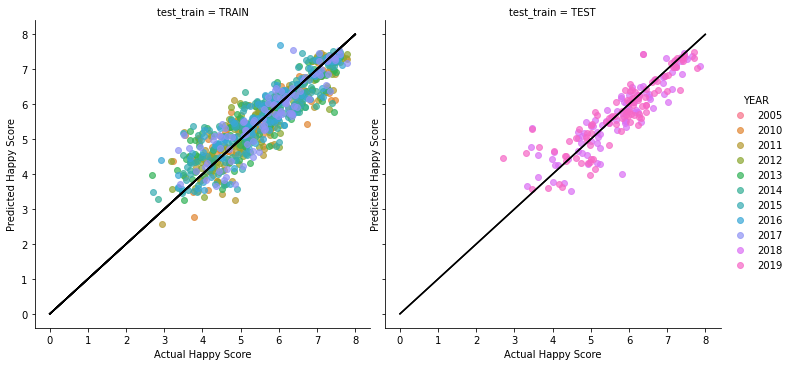

In [47]:
# specify a simple model with promotions entered last
my_model = str("Life_Ladder ~ Log_GDP_per_capita + Life_expectancy + Social_support + Freedom + Corruption + Generosity + Positive_affect + Negative_affect")

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = happy_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
happy_train['predict_happy'] = train_model_fit.fittedvalues
happy_train['test_train'] = "TRAIN"

# test set predictions from the model fit to the training set
happy_test['predict_happy'] = train_model_fit.predict(happy_test)
happy_test['test_train'] = "TEST"

happy_try = happy_train
happy_try = happy_try.append(happy_test)

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_try, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



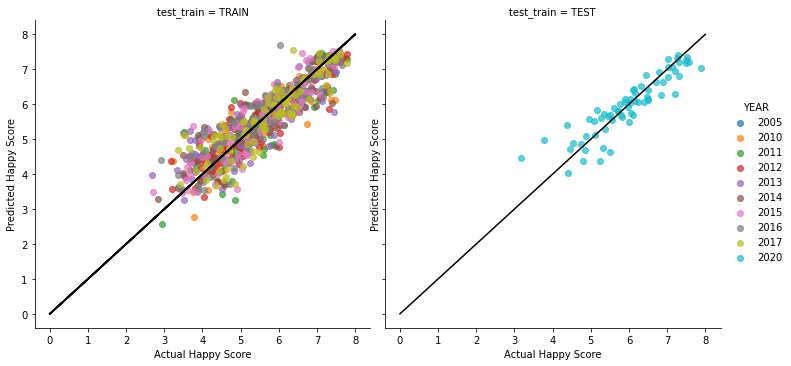

In [48]:
happy_test_2020 = happy_cleanup[happy_cleanup['YEAR'] == 2020]

# test set predictions from the model fit to the training set
happy_test_2020['predict_happy'] = train_model_fit.predict(happy_test_2020)
happy_test_2020['test_train'] = "TEST"
happy_test_2020 = happy_test_2020.append(happy_try[happy_try['test_train'] == 'TRAIN'])

# Initial code provided by Professor Fox
# trellis/lattice plot predicted attendance to actual attendance
# and any promotion

g = sns.FacetGrid(happy_test_2020, col="test_train", col_order=["TRAIN", "TEST"], height=5, hue='YEAR')

g.map(plt.scatter, "Life_Ladder", "predict_happy", alpha=.7)

def const_line(*args, **kwargs):
    x = np.arange(0, 9, 1)
    y = x
    plt.plot(y, x, c='k')
g.map(const_line)
g.add_legend();
g.set(xlabel="Actual Happy Score", ylabel="Predicted Happy Score")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas


Random Forest Prop Training Set Variance Accounted for:  0.854

Random Forest Prop of Test Set Variance Accounted for:  0.852
[0.39283601 0.56834808 0.00214333 0.00575937 0.00387888 0.01111923
 0.01490722 0.00100789]
feature: Log_GDP_per_capita, importance: 0.39283600797146684
feature: Life_expectancy, importance: 0.5683480826778755
feature: Social_support, importance: 0.002143327707439684
feature: Freedom, importance: 0.005759368235987313
feature: Corruption, importance: 0.0038788762707799695
feature: Generosity, importance: 0.011119232846696813
feature: Positive_affect, importance: 0.014907218546986947
feature: Negative_affect, importance: 0.001007885742767059


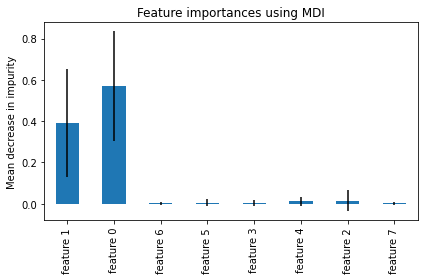

In [49]:
# Random Forest Regressor
happy_train = happy_cleanup[happy_cleanup['YEAR'] <= 2017]
happy_test = happy_cleanup[(happy_cleanup['YEAR'] == 2018) | (happy_cleanup['YEAR'] == 2019)]

from sklearn.ensemble import RandomForestRegressor

# https://stackoverflow.com/questions/40299055/pandas-how-to-fill-null-values-with-mean-of-a-groupby
happy_train.loc[:, ['Log_GDP_per_capita']] = happy_train.groupby('Country')['Log_GDP_per_capita'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Life_expectancy']] = happy_train.groupby('Country')['Life_expectancy'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Social_support']] = happy_train.groupby('Country')['Social_support'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Freedom']] = happy_train.groupby('Country')['Freedom'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Corruption']] = happy_train.groupby('Country')['Corruption'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Corruption']] = happy_train['Corruption'].fillna(happy_train['Corruption'].mean())
happy_train.loc[:, ['Generosity']] = happy_train.groupby('Country')['Generosity'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Positive_affect']] = happy_train.groupby('Country')['Positive_affect'].apply(lambda x: x.fillna(x.mean()))
happy_train.loc[:, ['Negative_affect']] = happy_train.groupby('Country')['Negative_affect'].apply(lambda x: x.fillna(x.mean()))
happy_train[['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']]\
 = happy_train[['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']].astype('float32')

x_train = happy_train.loc[:, ['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']]
y_train = happy_train.loc[:, ['Life_Ladder']].values

happy_test.loc[:, ['Log_GDP_per_capita']] = happy_test.groupby('Country')['Log_GDP_per_capita'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Log_GDP_per_capita']] = happy_test['Log_GDP_per_capita'].fillna(happy_test['Log_GDP_per_capita'].mean())
happy_test.loc[:, ['Life_expectancy']] = happy_test.groupby('Country')['Life_expectancy'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Social_support']] = happy_test.groupby('Country')['Social_support'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Freedom']] = happy_test.groupby('Country')['Freedom'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Corruption']] = happy_test.groupby('Country')['Corruption'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Corruption']] = happy_test['Corruption'].fillna(happy_test['Corruption'].mean())
happy_test.loc[:, ['Generosity']] = happy_test.groupby('Country')['Generosity'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Generosity']] = happy_test['Generosity'].fillna(happy_test['Generosity'].mean())
happy_test.loc[:, ['Positive_affect']] = happy_test.groupby('Country')['Positive_affect'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Positive_affect']] = happy_test['Positive_affect'].fillna(happy_test['Positive_affect'].mean())
happy_test.loc[:, ['Negative_affect']] = happy_test.groupby('Country')['Negative_affect'].apply(lambda x: x.fillna(x.mean()))
happy_test.loc[:, ['Negative_affect']] = happy_test['Negative_affect'].fillna(happy_test['Negative_affect'].mean())
happy_test[['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']]\
 = happy_test[['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']].astype('float32')
x_test = happy_test.loc[:, ['Log_GDP_per_capita', 'Life_expectancy', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Positive_affect', 'Negative_affect']]
y_test = happy_test.loc[:, ['Life_Ladder']]

regr = RandomForestRegressor(max_depth=2, random_state=0)
model_fit = regr.fit(x_train, y_train.ravel())
#Y_pred = regr.predict(x_test)

# As provided in Week 6 examples
happy_train['predict_value'] = model_fit.predict(x_train)
happy_train_result = round(happy_train['Life_Ladder'].corr(happy_train['predict_value']), 3)
print('\nRandom Forest Prop Training Set Variance Accounted for: ', happy_train_result)

# compute the proportion of response variance for test data
happy_test['predict_value'] = model_fit.predict(x_test)
happy_test_result = round(happy_test['Life_Ladder'].corr(happy_test['predict_value']), 3)
print('\nRandom Forest Prop of Test Set Variance Accounted for: ', happy_test_result)

importances = regr.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regr.estimators_], axis=0)

print(importances)
indices = np.argsort(importances)[::-1]
feature_names = [f'feature {i}' for i in range(x_train.shape[1])]
feature_names = [feature_names[i] for i in indices]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

for feat, importance in zip(x_train.columns, regr.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

## Happiness All Year Modeling

In [50]:
happy_all.head()

Country       year  Life_Ladder  ...  Country_2  GDP_per_capita  YEAR
0  Albania 2010-01-01        5.269  ...    Albania          4098.0  2010
1  Albania 2011-01-01        5.867  ...    Albania          4440.0  2011
2  Albania 2012-01-01        5.510  ...    Albania          4249.0  2012
3  Albania 2013-01-01        4.551  ...    Albania          4416.0  2013
4  Albania 2014-01-01        4.814  ...    Albania          4585.0  2014

[5 rows x 17 columns]

## Side Mission Happiness Gainers and Losers Since 2010

In [51]:
res = happy_all.pivot(index='Country', columns='year', values='Life_Ladder')
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [52]:
res['percent_gain/loss'] = percentage_change(res['2010-01-01'],res['2020-01-01']) 

In [53]:
 res.sort_values( # Happy Gainers
...     by="percent_gain/loss",
...     ascending=False
... ).head()

year       2005-01-01 00:00:00  ...  percent_gain/loss
Country                         ...                   
Bulgaria                   NaN  ...          43.098160
Serbia                     NaN  ...          35.440484
Mongolia                   NaN  ...          31.072830
Hungary                  5.194  ...          27.788360
Lithuania                  NaN  ...          26.154757

[5 rows x 13 columns]

In [54]:
 res.sort_values( # Happy Drainers
...     by="percent_gain/loss",
...     ascending=True
... ).head()

year         2005-01-01 00:00:00  ...  percent_gain/loss
Country                           ...                   
Venezuela                  7.170  ...         -38.833913
Zimbabwe                     NaN  ...         -32.507475
Jordan                     6.295  ...         -26.499102
El Salvador                  NaN  ...         -18.961424
Mexico                     6.581  ...         -12.319906

[5 rows x 13 columns]

In [55]:
df = happy_all
df1=df.drop(['Country','Region','Country_2','year','Log_GDP_per_capita'],axis=1)
df1 = df1.dropna()
df1.head()

Life_Ladder  Social_support  ...  GDP_per_capita  YEAR
0        5.269           0.733  ...          4098.0  2010
1        5.867           0.759  ...          4440.0  2011
2        5.510           0.785  ...          4249.0  2012
3        4.551           0.759  ...          4416.0  2013
4        4.814           0.626  ...          4585.0  2014

[5 rows x 12 columns]

## CatBoost

In [56]:
!pip install catboost
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 67.4 MB 27 kB/s 
catboost version: 0.26.1


In [57]:
features = [feat for feat in list(df1) 
            if feat != 'Life_Ladder']
print(features)

['Social_support', 'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Positive_affect', 'Negative_affect', 'Beer_PerCapita', 'Wine_PerCapita', 'GDP_per_capita', 'YEAR']


In [58]:
categorical_features = np.where(df1[features].dtypes != np.float)[0]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df1[features], 
                                                    df1[['Life_Ladder']], 
                                                    test_size=0.3, 
                                                     random_state=1)

In [60]:
params = {'iterations':10000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':6,
        'eval_metric':'R2',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':5000, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostRegressor(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0138526	test: 0.0082332	best: 0.0082332 (0)	total: 51.6ms	remaining: 8m 36s
200:	learn: 0.8275893	test: 0.8128970	best: 0.8128970 (200)	total: 841ms	remaining: 41s
400:	learn: 0.8896370	test: 0.8594625	best: 0.8594625 (400)	total: 1.61s	remaining: 38.5s
600:	learn: 0.9115292	test: 0.8691897	best: 0.8691897 (600)	total: 2.43s	remaining: 38.1s
800:	learn: 0.9262177	test: 0.8753382	best: 0.8753382 (800)	total: 3.28s	remaining: 37.7s
1000:	learn: 0.9380924	test: 0.8795543	best: 0.8795543 (1000)	total: 4.18s	remaining: 37.6s
1200:	learn: 0.9470387	test: 0.8826152	best: 0.8826152 (1200)	total: 5s	remaining: 36.6s
1400:	learn: 0.9548335	test: 0.8856403	best: 0.8856643 (1397)	total: 5.89s	remaining: 36.1s
1600:	learn: 0.9605756	test: 0.8883113	best: 0.8883113 (1600)	total: 6.8s	remaining: 35.7s
1800:	learn: 0.9656584	test: 0.8906857	best: 0.8906857 (1800)	total: 7.73s	remaining: 35.2s
2000:	learn: 0.9697993	test: 0.8922425	best: 0.8922439 (1998)	total: 8.66s	remaining: 34.6s
2200:	

In [61]:
# Predicting the Test set results
y_predcat = cat_model.predict(X_test)

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcat)))

Mean Absolute Error: 0.26762174090129376
Mean Squared Error: 0.131391759972341
Root Mean Squared Error: 0.36248001320395723


In [62]:
from sklearn.metrics import r2_score
print('R-squared:',r2_score(y_test, y_predcat))

R-squared: 0.9001658324573734


In [63]:
!pip install shap
import shap  # package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

from catboost import CatBoostRegressor, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491647 sha256=b7fa7be9c29c2c72db15200f11ad5dc032f12aa0c47fccb39bbbf59ab65510f9
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


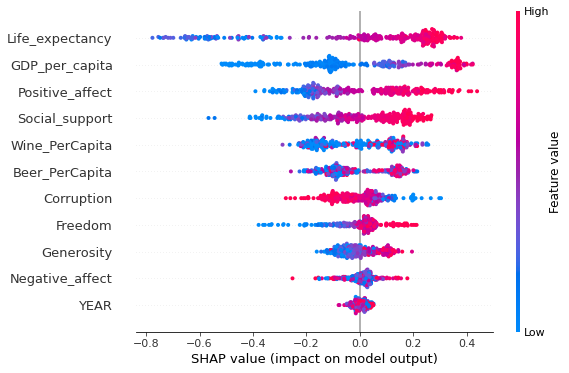

In [64]:
shap.summary_plot(shap_values, X_test)

## Old Split

In [65]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = df1.pop('Life_Ladder')
data_train, data_test, label_train, label_test = train_test_split(df1, label, test_size = 0.2, random_state = 42)

In [66]:
data_train.count(),data_test.count()

(Social_support     833
 Life_expectancy    833
 Freedom            833
 Generosity         833
 Corruption         833
 Positive_affect    833
 Negative_affect    833
 Beer_PerCapita     833
 Wine_PerCapita     833
 GDP_per_capita     833
 YEAR               833
 dtype: int64, Social_support     209
 Life_expectancy    209
 Freedom            209
 Generosity         209
 Corruption         209
 Positive_affect    209
 Negative_affect    209
 Beer_PerCapita     209
 Wine_PerCapita     209
 GDP_per_capita     209
 YEAR               209
 dtype: int64)

## Random Forest

In [67]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [68]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0, criterion='mse', n_jobs=-1)
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2872604408945697
Mean Squared Error: 0.14772415439955294
Root Mean Squared Error: 0.38434900077865813


In [69]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.225 seconds


In [70]:
print(importances)
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

[0.03858515 0.30009003 0.02371252 0.02949317 0.01962988 0.07793983
 0.01557945 0.01797938 0.00910689 0.45790163 0.00998207]


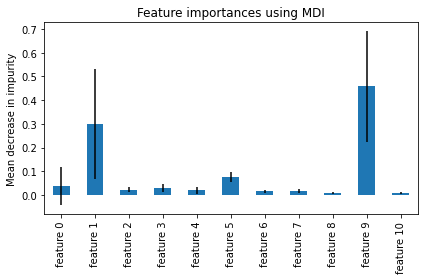

In [71]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature: Social_support, importance: 0.03858515161543131
feature: Life_expectancy, importance: 0.3000900266919717
feature: Freedom, importance: 0.023712515325145896
feature: Generosity, importance: 0.02949317317072158
feature: Corruption, importance: 0.01962987901900561
feature: Positive_affect, importance: 0.0779398299994101
feature: Negative_affect, importance: 0.015579447475628788
feature: Beer_PerCapita, importance: 0.017979383468406277
feature: Wine_PerCapita, importance: 0.009106891998758682
feature: GDP_per_capita, importance: 0.4579016347379132
feature: YEAR, importance: 0.00998206649760684


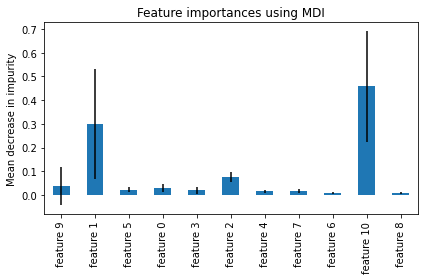

In [81]:
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)

#print(importances)
indices = np.argsort(importances)[::-1]
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
feature_names = [feature_names[i] for i in indices]
#print(feature_names)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

for feat, importance in zip(X_train.columns, regressor.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

## XGBoost

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg

In [ ]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
#print("RMSE : % f" %(rmse))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 1.7783079904428307
Mean Squared Error: 3.545735645005858
Root Mean Squared Error: 1.88301238578132


In [ ]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 50000)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
#print("RMSE : % f" %(rmse))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.37330420614736143
Mean Squared Error: 0.242067441034877
Root Mean Squared Error: 0.49200349697423595


## 2020 Master Variable Dataset

In [92]:
happy_2020.head()

Country name       year  Life Ladder  ...    COUNTRY  GDP (BILLIONS)  CODE
0      Albania 2020-01-01        5.365  ...    Albania           13.40   ALB
1    Argentina 2020-01-01        5.901  ...  Argentina          536.20   ARG
2    Australia 2020-01-01        7.137  ...  Australia         1483.00   AUS
3      Austria 2020-01-01        7.213  ...    Austria          436.10   AUT
4      Bahrain 2020-01-01        6.173  ...    Bahrain           34.05   BHR

[5 rows x 37 columns]

In [93]:
df = happy_2020
df1=df.drop(['Country name','Region','year','All-cause death count, 2017','All-cause death count, 2018','All-cause death count, 2019','All-cause death count, 2020','COUNTRY','CODE'],axis=1)
df1.head()

Life Ladder  ...  GDP (BILLIONS)
0        5.365  ...           13.40
1        5.901  ...          536.20
2        7.137  ...         1483.00
3        7.213  ...          436.10
4        6.173  ...           34.05

[5 rows x 28 columns]

In [94]:
from sklearn import preprocessing
# copy the data
df_max_scaled = df1.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

Life Ladder  ...  GDP (BILLIONS)
0      0.680061  ...        0.000769
1      0.748004  ...        0.030781
2      0.904677  ...        0.085132
3      0.914311  ...        0.025034
4      0.782482  ...        0.001955
..          ...  ...             ...
65     0.861706  ...        0.163490
66     0.890861  ...        1.000000
67     0.799848  ...        0.003192
68     0.579795  ...        0.012009
69     0.400558  ...        0.000789

[70 rows x 28 columns]

In [95]:
df1 = df_max_scaled

In [96]:
features = [feat for feat in list(df1) 
            if feat != 'Life Ladder']
print(features)

['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Beer_PerCapita', 'Wine_PerCapita', 'Crime Index', 'Safety Index', 'Pollution Index', 'Exp Pollution Index', 'Population 2020', 'Population 2019', 'COVID-19 deaths per 100,000 population in 2020', 'Median age', 'Island', 'Index of exposure to COVID-19  infections in other countries as of March 31', 'Log of average distance to SARS countries', 'WHO Western Pacific Region', 'Female head of government', 'Index of institutional trust', 'Gini coefficient of income', 'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average', 'GDP (BILLIONS)']


In [97]:
categorical_features = np.where(df1[features].dtypes != np.float)[0]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df1[features], 
                                                    df1[['Life Ladder']], 
                                                    test_size=0.2, 
                                                     random_state=1)

In [ ]:
params = {'iterations':10000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':6,
        'eval_metric':'R2',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':5000, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostRegressor(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0085173	test: -0.0861856	best: -0.0861856 (0)	total: 2.43ms	remaining: 24.3s
200:	learn: 0.8144302	test: 0.6812880	best: 0.6812880 (200)	total: 315ms	remaining: 15.3s
400:	learn: 0.9503848	test: 0.7288486	best: 0.7290020 (346)	total: 606ms	remaining: 14.5s
600:	learn: 0.9818714	test: 0.7283529	best: 0.7290020 (346)	total: 920ms	remaining: 14.4s
800:	learn: 0.9920441	test: 0.7282775	best: 0.7295655 (643)	total: 1.3s	remaining: 15s
1000:	learn: 0.9962875	test: 0.7225573	best: 0.7295655 (643)	total: 1.6s	remaining: 14.4s
1200:	learn: 0.9984041	test: 0.7221658	best: 0.7295655 (643)	total: 1.9s	remaining: 13.9s
1400:	learn: 0.9993138	test: 0.7157999	best: 0.7295655 (643)	total: 2.28s	remaining: 14s
1600:	learn: 0.9997446	test: 0.7145383	best: 0.7295655 (643)	total: 2.58s	remaining: 13.5s
1800:	learn: 0.9999001	test: 0.7140091	best: 0.7295655 (643)	total: 2.88s	remaining: 13.1s
2000:	learn: 0.9999578	test: 0.7146533	best: 0.7295655 (643)	total: 3.37s	remaining: 13.5s
2200:	learn:

In [89]:
# Predicting the Test set results
y_predcat = cat_model.predict(X_test)

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcat)))
print('R-squared:',r2_score(y_test, y_predcat))

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Mean Absolute Error: 0.26762174090129376
Mean Squared Error: 0.131391759972341
Root Mean Squared Error: 0.36248001320395723
R-squared: 0.9001658324573734
Elapsed time to compute the importances: 0.221 seconds


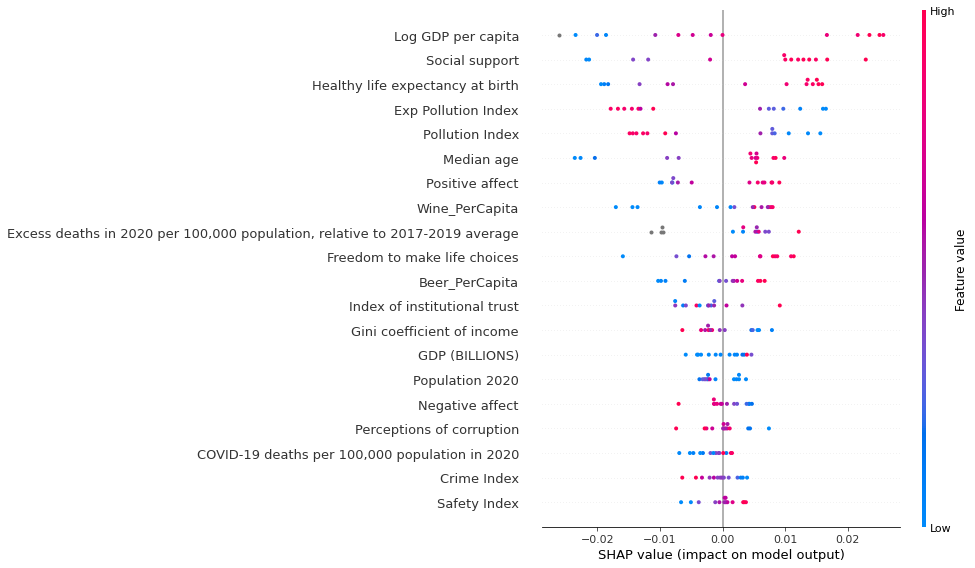

In [ ]:
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
shap.summary_plot(shap_values, X_test)

## Random Forest

In [102]:
df1.fillna(value=df1['Generosity'].mean(), inplace=True)
df1.fillna(value=df1['Log GDP per capita'].mean(), inplace=True)
df1.fillna(value=df1['Perceptions of corruption'].mean(), inplace=True)
df1.fillna(value=df1['Positive affect'].mean(), inplace=True)
df1.fillna(value=df1['Negative affect'].mean(), inplace=True)
# Build training and testing sets
# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
target_name = ['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target_name], test_size=0.2, random_state=19)

In [103]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0, criterion='mse', n_jobs=-1)
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.053158419283545866
Mean Squared Error: 0.00442932716280718
Root Mean Squared Error: 0.06655319047804681


feature: Log GDP per capita, importance: 0.43498633935094166
feature: Social support, importance: 0.16103829240108533
feature: Healthy life expectancy at birth, importance: 0.04940749625842293
feature: Freedom to make life choices, importance: 0.008265367930573028
feature: Generosity, importance: 0.006989900851830467
feature: Perceptions of corruption, importance: 0.01701781628761416
feature: Positive affect, importance: 0.006683098908908205
feature: Negative affect, importance: 0.006618006506541451
feature: Beer_PerCapita, importance: 0.020157922275840307
feature: Wine_PerCapita, importance: 0.012080369886831841
feature: Crime Index, importance: 0.00355635996340176
feature: Safety Index, importance: 0.0034307353425951947
feature: Pollution Index, importance: 0.04767574323836188
feature: Exp Pollution Index, importance: 0.030200239884833693
feature: Population 2020, importance: 0.004349318642631363
feature: Population 2019, importance: 0.004094392939508833
feature: COVID-19 deaths per 

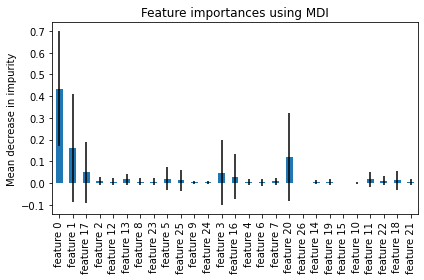

In [104]:
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)

#print(importances)
indices = np.argsort(importances)[::-1]
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
feature_names = [feature_names[i] for i in indices]
#print(feature_names)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

for feat, importance in zip(X_train.columns, regressor.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

In [ ]:
features = df1.columns.values.tolist()
features.remove('Life Ladder')
features.remove('Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average')
features.remove('GDP (BILLIONS)')
features.remove('Gini coefficient of income')

In [ ]:
# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
target_name = ['Life Ladder']

In [ ]:
df1.isnull().sum(axis = 0)

Life Ladder                                                                     0
Log GDP per capita                                                              3
Social support                                                                  0
Healthy life expectancy at birth                                                0
Freedom to make life choices                                                    0
Generosity                                                                      3
Perceptions of corruption                                                       5
Positive affect                                                                 1
Negative affect                                                                 1
Beer_PerCapita                                                                  0
Wine_PerCapita                                                                  0
Crime Index                                                                     0
Safety Index    

In [ ]:
df1.fillna(value=df1['Generosity'].mean(), inplace=True)
df1.fillna(value=df1['Log GDP per capita'].mean(), inplace=True)
df1.fillna(value=df1['Perceptions of corruption'].mean(), inplace=True)
df1.fillna(value=df1['Positive affect'].mean(), inplace=True)
df1.fillna(value=df1['Negative affect'].mean(), inplace=True)

In [ ]:
# Build training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target_name], test_size=0.2, random_state=19)

In [ ]:
# Builds the model
model = sm.OLS(y_train, X_train)

# Fits the model
results = model.fit()

# Model results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     8.768
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           3.02e-08
Time:                        00:36:55   Log-Likelihood:                 94.682
No. Observations:                  56   AIC:                            -141.4
Df Residuals:                      32   BIC:                            -92.76
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Model 1 R-squared:  0.8189488114774591
Model 1 RMSE:  0.058808972067479426
Model 1 MAE:  0.044728099963722935


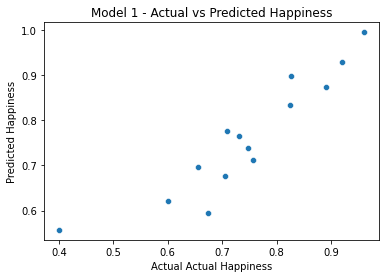

In [ ]:
# Predict salaries for first model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
prediction = results.predict(X_test)
prediction = pd.Series(prediction)

prediction_results = pd.concat([y_test, prediction], axis=1, ignore_index=False)
prediction_results.columns = ['TotalPay Actual', 'TotalPay Predicted']

print('Model 1 R-squared: ', r2_score(prediction_results['TotalPay Actual'], 
                                      prediction_results['TotalPay Predicted']))
print('Model 1 RMSE: ', np.sqrt(mean_squared_error(prediction_results['TotalPay Actual'], 
                                                   prediction_results['TotalPay Predicted'])))
print('Model 1 MAE: ', mean_absolute_error(prediction_results['TotalPay Actual'], 
                                           prediction_results['TotalPay Predicted']))
sns.scatterplot(x='TotalPay Actual', y='TotalPay Predicted', data=prediction_results)
_ = plt.title('Model 1 - Actual vs Predicted Happiness')
_ = plt.xlabel('Actual Actual Happiness')
_ = plt.ylabel('Predicted Happiness')
plt.show()

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 3, 5, 6, 7, 8, 12, 19, 20, 22]


In [ ]:
features = df1.columns.values.tolist()
features.remove('Life Ladder')
features.remove('Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average')
features.remove('GDP (BILLIONS)')
features.remove('Gini coefficient of income')
features.remove('Log GDP per capita')
features.remove('Healthy life expectancy at birth')
features.remove('Generosity')
features.remove('Wine_PerCapita')
features.remove('Crime Index')
features.remove('Safety Index')
features.remove('Exp Pollution Index')
features.remove('Population 2020')
features.remove('COVID-19 deaths per 100,000 population in 2020')
features.remove('Population 2019')
features.remove('Median age')
features.remove('Island')
features.remove('WHO Western Pacific Region')
features.remove('Index of institutional trust')

In [ ]:
# Builds the model
model = sm.OLS(y_train, X_train)

# Fits the model
results = model.fit()

# Model results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     8.768
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           3.02e-08
Time:                        00:36:58   Log-Likelihood:                 94.682
No. Observations:                  56   AIC:                            -141.4
Df Residuals:                      32   BIC:                            -92.76
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Model 1 R-squared:  0.8189488114774591
Model 1 RMSE:  0.058808972067479426
Model 1 MAE:  0.044728099963722935


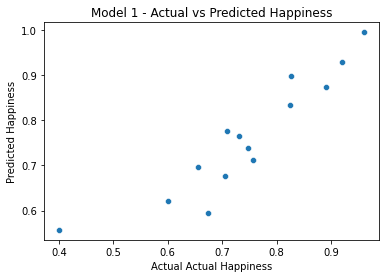

In [ ]:
# Predict salaries for first model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
prediction = results.predict(X_test)
prediction = pd.Series(prediction)

prediction_results = pd.concat([y_test, prediction], axis=1, ignore_index=False)
prediction_results.columns = ['TotalPay Actual', 'TotalPay Predicted']

print('Model 1 R-squared: ', r2_score(prediction_results['TotalPay Actual'], 
                                      prediction_results['TotalPay Predicted']))
print('Model 1 RMSE: ', np.sqrt(mean_squared_error(prediction_results['TotalPay Actual'], 
                                                   prediction_results['TotalPay Predicted'])))
print('Model 1 MAE: ', mean_absolute_error(prediction_results['TotalPay Actual'], 
                                           prediction_results['TotalPay Predicted']))
sns.scatterplot(x='TotalPay Actual', y='TotalPay Predicted', data=prediction_results)
_ = plt.title('Model 1 - Actual vs Predicted Happiness')
_ = plt.xlabel('Actual Actual Happiness')
_ = plt.ylabel('Predicted Happiness')
plt.show()

In [ ]:
features = df1.columns.values.tolist()
features.remove('Life Ladder')
features.remove('Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average')
features.remove('GDP (BILLIONS)')
features.remove('Gini coefficient of income')
features.remove('Log GDP per capita')
features.remove('Healthy life expectancy at birth')
features.remove('Generosity')
features.remove('Wine_PerCapita')
features.remove('Crime Index')
features.remove('Safety Index')
features.remove('Exp Pollution Index')
features.remove('Population 2020')
features.remove('COVID-19 deaths per 100,000 population in 2020')
features.remove('Population 2019')
features.remove('Median age')
features.remove('Island')
features.remove('WHO Western Pacific Region')
features.remove('Index of institutional trust')
features.remove('Freedom to make life choices')
features.remove('Log of average distance to SARS countries')
features.remove('Negative affect')
features.remove('Positive affect')
features.remove('Pollution Index')
features.remove('Perceptions of corruption')
features.remove('Beer_PerCapita')

In [ ]:
# Build training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target_name], test_size=0.2, random_state=19)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

                                             feature       VIF
0                                     Social support  3.685612
1  Index of exposure to COVID-19  infections in o...  3.648629
2                          Female head of government  1.216368


In [ ]:
# Builds the model
model = sm.OLS(y_train, X_train)

# Fits the model
results = model.fit()

# Model results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              2334.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):                    2.99e-56
Time:                        00:36:58   Log-Likelihood:                          71.341
No. Observations:                  56   AIC:                                     -136.7
Df Residuals:                      53   BIC:                                     -130.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                                                                  coef    std err          t      P>|t| 

Model 1 R-squared:  0.6027812919509774
Model 1 RMSE:  0.08710794045274914
Model 1 MAE:  0.07100046802819382


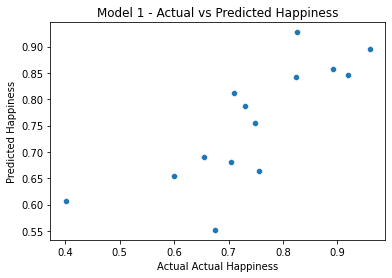

In [ ]:
# Predict salaries for first model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
prediction = results.predict(X_test)
prediction = pd.Series(prediction)

prediction_results = pd.concat([y_test, prediction], axis=1, ignore_index=False)
prediction_results.columns = ['TotalPay Actual', 'TotalPay Predicted']

print('Model 1 R-squared: ', r2_score(prediction_results['TotalPay Actual'], 
                                      prediction_results['TotalPay Predicted']))
print('Model 1 RMSE: ', np.sqrt(mean_squared_error(prediction_results['TotalPay Actual'], 
                                                   prediction_results['TotalPay Predicted'])))
print('Model 1 MAE: ', mean_absolute_error(prediction_results['TotalPay Actual'], 
                                           prediction_results['TotalPay Predicted']))
sns.scatterplot(x='TotalPay Actual', y='TotalPay Predicted', data=prediction_results)
_ = plt.title('Model 1 - Actual vs Predicted Happiness')
_ = plt.xlabel('Actual Actual Happiness')
_ = plt.ylabel('Predicted Happiness')
plt.show()

## Difference in Happiness + COVID

In [ ]:
happy_all_2019 = happy_all[happy_all'YEAR'] == 2019
happy_all_2019.shape

In [ ]:
happy_2020

In [ ]:
hapy_shift = happy_2020.merge(happ_all_2019, left_on = 'Country name', right_on = 'Country namey')